<a href="https://colab.research.google.com/github/Subhadip6788/Smart-Agricultural-System/blob/main/Crop%20Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import opendatasets as od

In [ ]:
od.download("https://www.kaggle.com/datasets/chitrakumari25/smart-agricultural-production-optimizing-engine")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: anoshdamania
Your Kaggle Key: ··········


100%|██████████| 63.7k/63.7k [00:00<00:00, 33.3MB/s]

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/smart-agricultural-production-optimizing-engine/Crop_recommendation.csv")

In [ ]:
df = df.rename(columns = {'rainfall' : 'moisture'})
df = df.drop(columns=['N', 'P', 'K'])

In [ ]:
df

,temperature,humidity,ph,moisture,label
0,20.879744,82.002744,6.502985,202.935536,rice
1,21.770462,80.319644,7.038096,226.655537,rice
2,23.004459,82.320763,7.840207,263.964248,rice
3,26.491096,80.158363,6.980401,242.864034,rice
4,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...
2195,26.774637,66.413269,6.780064,177.774507,coffee
2196,27.417112,56.636362,6.086922,127.924610,coffee
2197,24.131797,67.225123,6.362608,173.322839,coffee
2198,26.272418,52.127394,6.758793,127.175293,coffee


In [ ]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  2200 non-null   float64
 1   humidity     2200 non-null   float64
 2   ph           2200 non-null   float64
 3   moisture     2200 non-null   float64
 4   label        2200 non-null   object 
dtypes: float64(4), object(1)
memory usage: 86.1+ KB


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split

<Axes: >

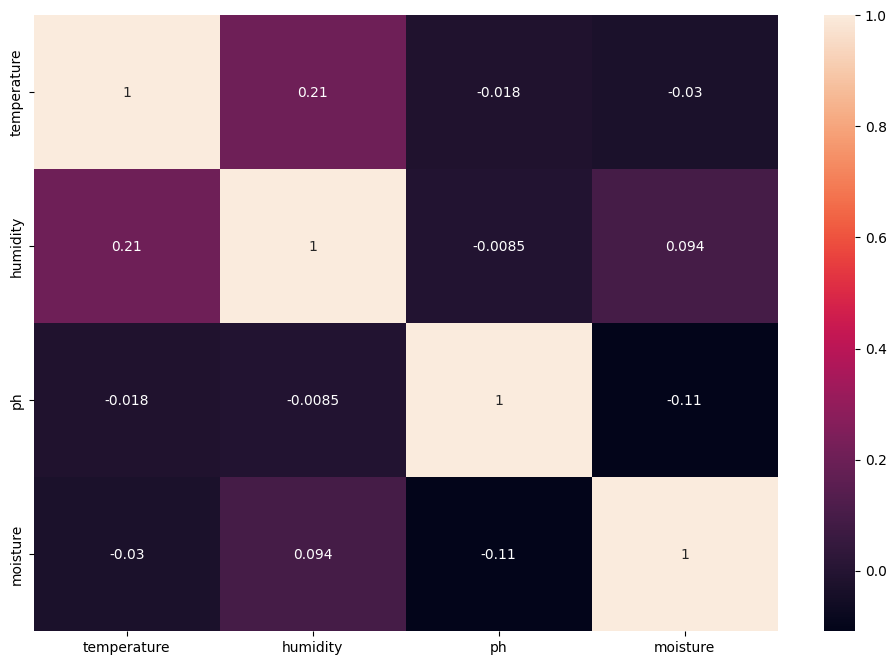

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

<Axes: >

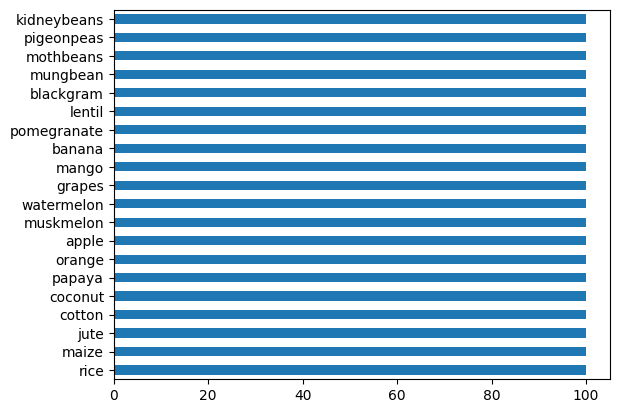

In [ ]:
df['label'].value_counts()[:20].plot(kind='barh')

In [ ]:
y = df['label']

In [ ]:
X = df.drop(columns=['label'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
X_train.shape

(1760, 4)

In [ ]:
y_train.shape

(1760,)

In [ ]:
acc = []
model = []

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
dt = DecisionTreeClassifier(criterion="entropy",random_state=42,max_depth=5)
dt.fit(X_train,y_train)
predicted_values = dt.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(y_test,predicted_values))

DecisionTrees's Accuracy is:  82.5
              precision    recall  f1-score   support

       apple       0.80      1.00      0.89        16
      banana       0.87      1.00      0.93        26
   blackgram       0.61      1.00      0.76        19
    chickpea       1.00      1.00      1.00        19
     coconut       1.00      1.00      1.00        19
      coffee       0.48      1.00      0.65        14
      cotton       1.00      0.44      0.62        18
      grapes       0.74      1.00      0.85        17
        jute       0.71      1.00      0.83        15
 kidneybeans       1.00      1.00      1.00        24
      lentil       0.90      1.00      0.95        19
       maize       0.91      0.84      0.87        25
       mango       0.86      1.00      0.93        25
   mothbeans       1.00      0.57      0.72        23
    mungbean       1.00      0.94      0.97        18
   muskmelon       1.00      1.00      1.00        17
      orange       0.75      0.35      0.47   

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import sklearn.tree as tree

[Text(0.5, 0.875, 'x[1] <= 74.862\nentropy = 4.458\nsamples = 1760\nvalue = [84, 74, 81, 81, 81, 86, 82, 83, 85, 76, 81, 75\n75, 77, 82, 83, 74, 82, 79, 81, 76, 82]'),
 Text(0.25, 0.625, 'x[1] <= 27.685\nentropy = 3.277\nsamples = 737\nvalue = [0, 0, 81, 81, 0, 86, 0, 0, 26, 76, 81, 75, 75\n77, 0, 0, 0, 0, 79, 0, 0, 0]'),
 Text(0.125, 0.375, 'x[2] <= 6.025\nentropy = 0.999\nsamples = 157\nvalue = [0, 0, 0, 81, 0, 0, 0, 0, 0, 76, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'x[3] <= 75.8\nentropy = 2.944\nsamples = 580\nvalue = [0, 0, 81, 0, 0, 86, 0, 0, 26, 0, 81, 75, 75\n77, 0, 0, 0, 0, 79, 0, 0, 0]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'x[1] <= 90.006\nentropy = 3.695\nsamples = 1023\nvalue = [84, 74, 0, 0, 81, 0, 82, 83, 59, 0, 0, 0, 0\n0, 82, 83, 74, 82, 0, 81, 76, 82]'),
 Text(0.625, 0.375, 'x[3] <= 89.955\nentropy = 2.968\nsampl

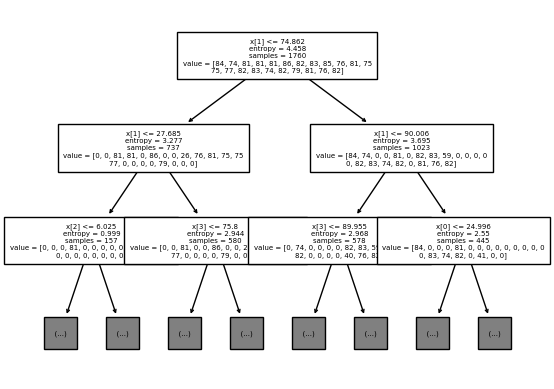

In [ ]:
tree.plot_tree(dt, max_depth = 2, fontsize = 5)

In [ ]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB()

gnb.fit(X_train,y_train)

predicted_values = gnb.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

Naive Bayes's Accuracy is:  0.9545454545454546
              precision    recall  f1-score   support

       apple       0.89      1.00      0.94        16
      banana       1.00      0.92      0.96        26
   blackgram       0.90      1.00      0.95        19
    chickpea       1.00      1.00      1.00        19
     coconut       1.00      1.00      1.00        19
      coffee       0.82      1.00      0.90        14
      cotton       0.85      0.94      0.89        18
      grapes       1.00      1.00      1.00        17
        jute       0.88      0.93      0.90        15
 kidneybeans       1.00      1.00      1.00        24
      lentil       0.95      1.00      0.97        19
       maize       0.96      0.92      0.94        25
       mango       1.00      1.00      1.00        25
   mothbeans       1.00      0.91      0.95        23
    mungbean       1.00      0.94      0.97        18
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      0.88 

In [ ]:
from sklearn.svm import SVC
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(X_train)
x_train_norm = norm.transform(X_train)
# transform testing dataabs
x_test_norm = norm.transform(X_test)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(x_train_norm,y_train)
predicted_values = SVM.predict(x_test_norm)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

SVM's Accuracy is:  0.9295454545454546
              precision    recall  f1-score   support

       apple       0.89      1.00      0.94        16
      banana       0.96      0.88      0.92        26
   blackgram       0.95      1.00      0.97        19
    chickpea       1.00      1.00      1.00        19
     coconut       1.00      1.00      1.00        19
      coffee       0.82      1.00      0.90        14
      cotton       0.85      0.94      0.89        18
      grapes       1.00      1.00      1.00        17
        jute       0.72      0.87      0.79        15
 kidneybeans       0.96      1.00      0.98        24
      lentil       0.95      1.00      0.97        19
       maize       0.96      1.00      0.98        25
       mango       0.93      1.00      0.96        25
   mothbeans       1.00      0.91      0.95        23
    mungbean       1.00      0.94      0.97        18
   muskmelon       0.94      1.00      0.97        17
      orange       0.95      0.81      0.8

In [ ]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(X_train,y_train)

predicted_values = LogReg.predict(X_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

Logistic Regression's Accuracy is:  0.6659090909090909
              precision    recall  f1-score   support

       apple       0.59      1.00      0.74        16
      banana       0.53      0.38      0.44        26
   blackgram       0.70      0.74      0.72        19
    chickpea       0.94      0.84      0.89        19
     coconut       0.73      0.84      0.78        19
      coffee       0.75      0.64      0.69        14
      cotton       0.50      0.61      0.55        18
      grapes       0.53      0.53      0.53        17
        jute       0.55      0.73      0.63        15
 kidneybeans       0.88      0.92      0.90        24
      lentil       0.71      0.79      0.75        19
       maize       0.91      0.40      0.56        25
       mango       0.93      1.00      0.96        25
   mothbeans       0.72      0.78      0.75        23
    mungbean       0.67      0.78      0.72        18
   muskmelon       1.00      1.00      1.00        17
      orange       0.33   

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(X_train,y_train)

predicted_values = RF.predict(X_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

RF's Accuracy is:  0.9545454545454546


<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

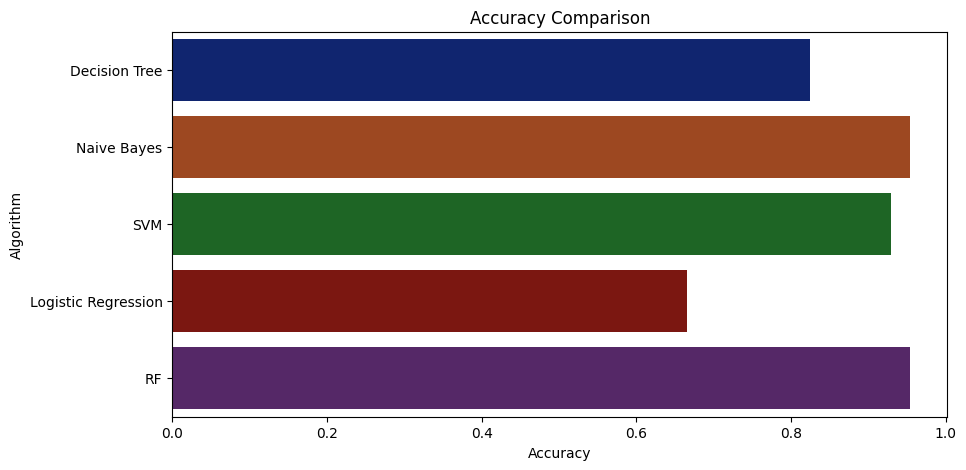

In [ ]:
plt.figure(figsize=[10,5])
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [ ]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.825
Naive Bayes --> 0.9545454545454546
SVM --> 0.9295454545454546
Logistic Regression --> 0.6659090909090909
RF --> 0.9545454545454546


In [ ]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 44.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 51.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.5/140.5 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 

In [ ]:
import gradio as gr

In [ ]:
def crop_recom(Temperature,Humidity,PH,Moisture):
    crop = RF.predict([[Temperature,Humidity,PH,Moisture]])
    return crop[0]

In [ ]:
interface = gr.Interface(
  fn =crop_recom, #function
  inputs = ['number','number','number','number'],
  outputs = ['text']  
).launch(share=False)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>